| Data | Xi1 | Xi2 | Yi  | αi    |
| ---- | --- | --- | --- | ----- |
| X1   | 4   | 2.9 | 1   | 0.414 |
| X2   | 4   | 4   | 1   | 0     |
| X3   | 1   | 2.5 | -1  | 0     |
| X4   | 2.5 | 1   | -1  | 0.018 |
| X5   | 4.9 | 4.5 | 1   | 0     |
| X6   | 1.9 | 1.9 | -1  | 0     |
| X7   | 3.5 | 4   | 1   | 0.018 |
| X8   | 0.5 | 1.5 | -1  | 0     |
| X9   | 2   | 2.1 | -1  | 0.414 |
| X10  | 4.5 | 2.5 | 1   | 0     |


[25 pts] Support Vector Machines: Given 10 points in Table 1, along with their classes and their Lagrangian multipliers (αi), answer the following questions. The solution is already provided in the lecture slide.

[10 pts] Using NumPy, implement a simple SVM that returns the coefficients of the hyperplane. The simple SVM does not require an SDG approach. The simple SVM has three arguments, X, Y, and α, as simple_SVM(X,Y,alpha). What is the equation of h(x)? Draw the hyperplane with the 10 points.

[10 pts] Write a method that calculates the distance of each point from the hyperplane and returns a binary result if a point is within the margin. If a point is in the margin, the binary result is 1 and 0 otherwise. What is the maximized margin? Return the result in the table format as shown.

| Data | Distance | In Margin? |
| ---- | -------- | ---------- |
| x*1  | D*1      | {0,1}      |
| ⋮    | ⋮        | ⋮          |
| x*10 | D_10     | {0,1}      |

[5 pts] Classify the point z = (3, 3)T using h(x) from above.


# SVM

We are given a set of 10 points along with their classes and Lagrangian multipliers.
We can solve for the coefficients of the hyperplane using the the following algorithm for SVM :
For calculating the weight vector, we have:

K(Xi1, Xi2) = e^{-\gamma ||Xi1 - Xi2||^2}

w = Σ(αi * yj _ K([Xj1, Xj2], [Xi1, Xi2]))

And for calculating the bias, we have:
b = yj - Σ(αj _ yj _ K([Xj1, Xj2], [Xi1, Xi2]))

Once we have calculated the weight vector and bias, we can use them to classify new data points using the hyperplane function:

h(x) = w^T x + b

where x is the new data point.

To calculate the distance of each point from the hyperplane, we use the formula:

distance = |h(x)| / ||w||

where ||w|| is the norm of the weight vector.

Finally, to calculate the margin, we need to find the distance between the hyperplane and the closest data point from either class. This can be done by iterating over all the data points and finding the minimum distance for each class.


In [16]:
# imports for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
class SVM_simple:
    def __init__(self, X, y, alphaLagrange, gammaRadial):
        self.X = X
        self.y = y
        self.alphaLagrange = alphaLagrange
        self.gammaRadial = gammaRadial

    def rbf_kernel(X, gamma):
        # Compute the radial basis function (RBF) kernel matrix.
        # Args:
        #     X: ndarray of shape (n_samples, n_features)
        #         The input data matrix.
        #     gamma: float
        #         The gamma parameter for the RBF kernel.

        # Returns:
        #     K: ndarray of shape (n_samples, n_samples)
        #         The RBF kernel matrix.
        n_samples = X.shape[0]
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                norm = np.linalg.norm(X[i] - X[j]) ** 2
                expTerm = -gamma * norm
                K[i, j] = np.exp(expTerm)
        return K

    def fit(self):
        # w = Σ(αi _ yj _ K([Xj1, Xj2], [Xi1, Xi2]))
        n_samples = self.X.shape[0]
        for i in range(0, n_samples):
            afterKernel = self.rbf_kernel(self.X,self.gammaRadial)
            w = np.sum(self.alphaLagrange[i])

In [15]:
# initialise data
X = np.array(
    [
        4,
        2.9,
        4,
        4,
        1,
        2.5,
        2.5,
        1,
        4.9,
        4.5,
        1.9,
        1.9,
        3.5,
        4,
        0.5,
        1.5,
        2,
        2.1,
        4.5,
        2.5,
    ]
).reshape(10, 2)
print("X: \n", X)

y = np.array([1, 1, -1, -1, 1, -1, 1, -1, -1, 1])
print("y: \n", y)

alphaLagrange = np.array([0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0])

X: 
 [[4.  2.9]
 [4.  4. ]
 [1.  2.5]
 [2.5 1. ]
 [4.9 4.5]
 [1.9 1.9]
 [3.5 4. ]
 [0.5 1.5]
 [2.  2.1]
 [4.5 2.5]]
y: 
 [ 1  1 -1 -1  1 -1  1 -1 -1  1]


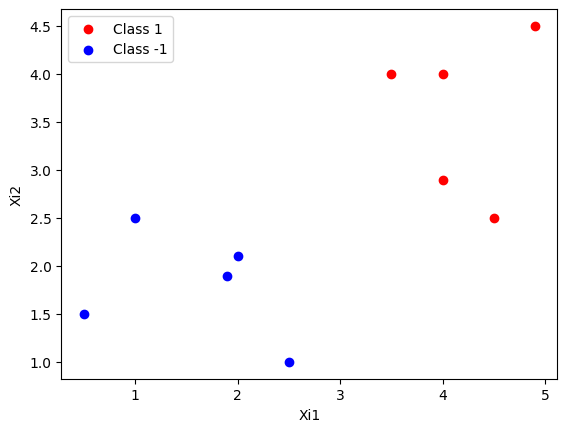

In [20]:
# lets just visualise the data we got 
# separate the data points by class
class1 = X[y==1]
class2 = X[y==-1]

# plot the data points
plt.scatter(class1[:,0], class1[:,1], c='r', label='Class 1')
plt.scatter(class2[:,0], class2[:,1], c='b', label='Class -1')

# add axis labels and legend
plt.xlabel('Xi1')
plt.ylabel('Xi2')
plt.legend()
plt.show()

In [ ]:
# initialise the model
svm_model = SVM_simple(X,y,alphaLagrange,gammaRadial=0.1)

#fit the model
svm_model.fit(X,y)